# Evaluation of the participant questionnaire
## Data management

In [1]:
#Import Statements
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "sans-serif"
import seaborn as sns


sns.set() # Setting seaborn as default style
sns.set_theme()

# declare global helpers
condition_values = ['0ms','10ms','400ms','10ms echo','400ms echo']
groupnames = [0,1,2,3,4]
browsernames = ["MSIE", "Firefox", "Safari", "Chrome", "Opera"]

In [2]:
# 1. Time results were received.
# 2. MD5 hash of participant's IP address.
# 3. Controller name.
# 4. Item number.
# 5. Element number.
# 6. Type.
# 7. Group.
# 8. PennElementType.
# 9. PennElementName.
# 10. Parameter.
# 11. Value.
# 12. EventTime.
# 13. Comments.
df = pd.read_csv('../data/results_audiovisual_exp.txt',
                 sep = ',',
                 comment='#', 
                 header=None,
                 names = ['time','hash', 'controller','item','element', 'type', 'group','petype','pename','parameter', 'value', 'event_time', 'comments'],
                engine = 'python')

In [3]:
df.info()
print([*df])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time        3263 non-null   int64  
 1   hash        3263 non-null   object 
 2   controller  3263 non-null   object 
 3   item        3263 non-null   int64  
 4   element     3263 non-null   int64  
 5   type        3263 non-null   object 
 6   group       0 non-null      float64
 7   petype      3263 non-null   object 
 8   pename      3263 non-null   object 
 9   parameter   3254 non-null   object 
 10  value       2987 non-null   object 
 11  event_time  3254 non-null   float64
 12  comments    1760 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 331.5+ KB
['time', 'hash', 'controller', 'item', 'element', 'type', 'group', 'petype', 'pename', 'parameter', 'value', 'event_time', 'comments']


In [16]:
print(list(df['parameter'].unique()))

[None, '_Trial_', 'Choice', 'consent', 'psych', 'comment', 'gender', 'handedness', 'language', 'hearing', 'vision', 'asd', 'headphones', 'environment', 'age']


## Gender

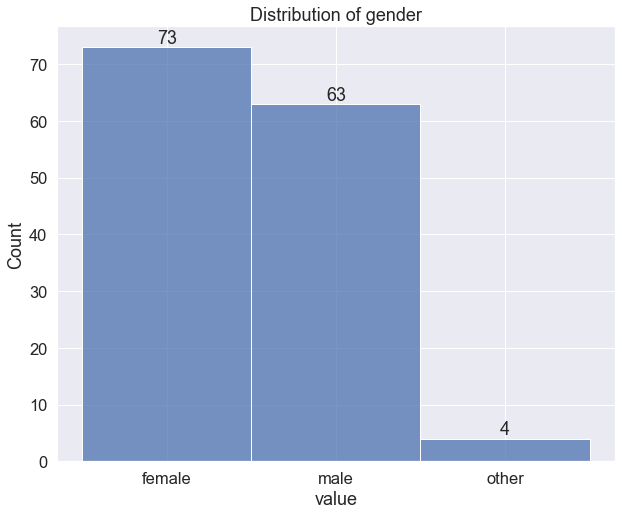

In [4]:
#display all the genders
list(df[df['parameter'] == 'gender']['value'])
fig = plt.gcf()
fig.set_size_inches(10, 8)
sns.set(font_scale=1.5)

ax = sns.histplot(data = df[df['parameter'] == 'gender'],x = 'value')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.title('Distribution of gender')

plt.savefig("gender_dist.png", dpi=300, bbox_inches='tight')

## Vision

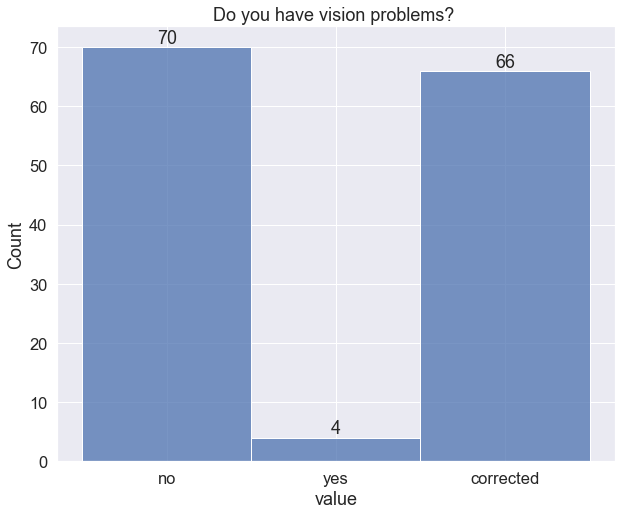

In [5]:
fig = plt.gcf()
fig.set_size_inches(10, 8)
sns.set(font_scale=1.5)

ax = sns.histplot(data = df[df['parameter'] == 'vision'],x = 'value')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.title('Do you have vision problems? ')

plt.savefig("vision_dist.png", dpi=300, bbox_inches='tight')

In [6]:
ages = df[df['parameter'] == 'age'].sort_values(by='value')
ages = ages[ages['value'] != '333']
ages = ages[ages['value'] != '14']
ages = ages[ages['value'] != '11']
agelist = list(ages['value'])
agelist = list(map(int, agelist))
mean = np.mean(agelist)
print(agelist)
print(mean)

[19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 27, 30, 30, 30, 30, 30, 32, 33, 38, 51, 56, 56, 56, 56, 56, 56]
25.441176470588236


['time', 'hash', 'controller', 'item', 'element', 'type', 'group', 'petype', 'pename', 'parameter', 'value', 'event_time', 'comments']


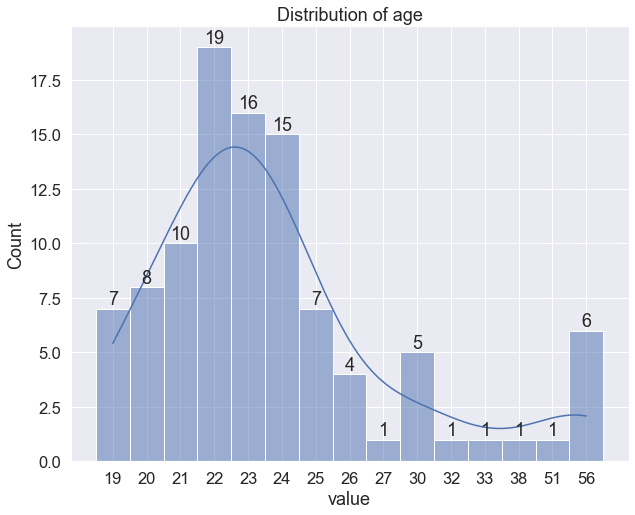

In [7]:
#display all the ages
print(list(ages))
fig = plt.gcf()
fig.set_size_inches(10, 8)
sns.set(font_scale=1.5)


ax = sns.histplot(x = ages['value'],
                 kde = True)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.title('Distribution of age')
plt.savefig("age_dist.png", dpi=300, bbox_inches='tight')

## Comments

In [8]:
#display all the comments
list(df[df['parameter'] == 'comment']['value'].dropna())

['test',
 'go Aron-Schmaron!',
 'als Kind häufig Mittelohrentzündungen gehabt und nur knapp Paukenröhrchen entkommen%2C wahrscheinlich nicht diagnostiziertes eingeschränktes Hörvermögen...',
 'test2',
 'test',
 'Es ist schönes Wetter und ich freue mich auf die Studie.',
 ' ',
 'Mein Hörvermögen ist auf dem linken Ohr eingeschränkt%2C aber ich trage kein Hörgerät und verstehe Sprache damit.']

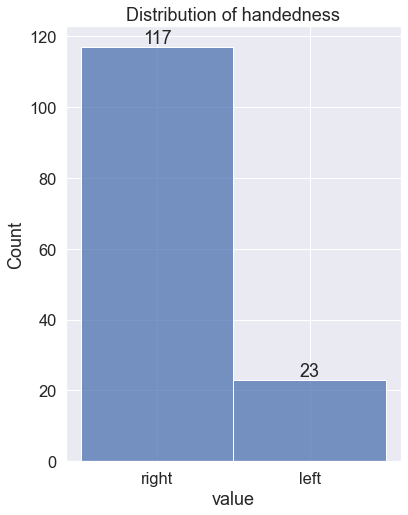

In [9]:
fig = plt.gcf()
fig.set_size_inches(6, 8)
sns.set(font_scale=1.5)

ax = sns.histplot(data = df[df['parameter'] == 'handedness'],x = 'value')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')


plt.title('Distribution of handedness')
plt.savefig("handedness_dist.png", dpi=300, bbox_inches='tight')

## Participants to exclude

In [10]:
#Messages of people who answered psych
dfp =df.loc[(df['parameter'] == 'psych') & (df['value'] != 'no')]
dfp['value'].dropna()

109                 tese
784                 test
805                 test
1071          Depression
2744    Bipolare Störung
Name: value, dtype: object

In [11]:
#Messages of people who answered asd
dfp =df.loc[(df['parameter'] == 'asd') & (df['value'] != 'no')]
dfp['value']

793    yes
814    yes
Name: value, dtype: object